In [1]:
from logits_reader import LogitsReader

/rds/user/al826/hpc-work/envs/torch1.12/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(0.0, 1.0)

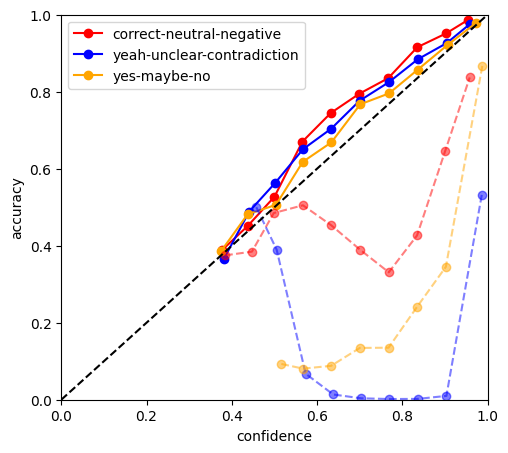

In [63]:
from matplotlib.pyplot import figure

figure(figsize=(5.5, 5))

dataset = 'snli'
path = f"/home/al826/rds/hpc-work/2023/prompts/calib/search/submit/outputs/flan-t5-large/{dataset}/prompt_0"
logits_reader = LogitsReader(path=path, dataset=dataset)

label_word_sets = [['correct', 'neutral', 'negative'], ['yeah', 'unclear', 'contradiction'], ['yes', 'maybe', 'no']]
colors = ['red', 'blue', 'orange']


for label_words, c in zip(label_word_sets, colors):
    logits_reader.plot_conf_acc_curve(label_words=label_words, norm='log-norm', color=c, linestyle='-')
    
for label_words, c in zip(label_word_sets, colors):
    logits_reader.plot_conf_acc_curve(label_words=label_words, norm=None, color=c, linestyle='--', alpha=0.5)

plt.legend(['-'.join(word_set) for word_set in label_word_sets])
plt.xlabel('confidence')
plt.ylabel('accuracy')
plt.plot([0,1],[0,1], linestyle='--', color='k')
plt.xlim(0, 1)
plt.ylim(0, 1)

(0.4, 1.0)

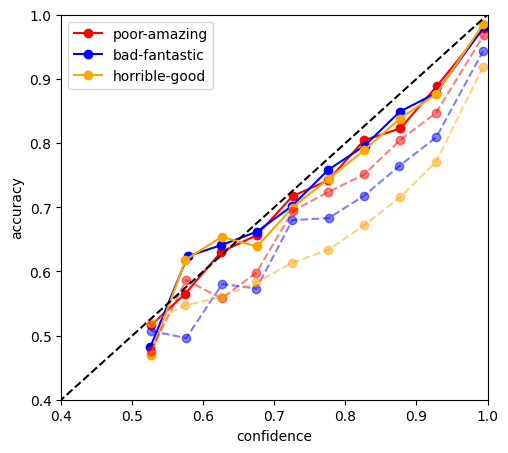

In [64]:
from matplotlib.pyplot import figure

figure(figsize=(5.5, 5))

dataset = 'imdb'
path = f"/home/al826/rds/hpc-work/2023/prompts/calib/search/submit/outputs/flan-t5-large/{dataset}/prompt_0"
logits_reader = LogitsReader(path=path, dataset=dataset)

label_word_sets = [['poor', 'amazing'],['bad', 'fantastic'], ['horrible', 'good']]
colors = ['red', 'blue', 'orange']

for label_words, c in zip(label_word_sets, colors):
    logits_reader.plot_conf_acc_curve(label_words=label_words, norm='log-norm', color=c, linestyle='-')
    
for label_words, c in zip(label_word_sets, colors):
    logits_reader.plot_conf_acc_curve(label_words=label_words, norm=None, color=c, linestyle='--', alpha=0.5)

plt.legend(['-'.join(word_set) for word_set in label_word_sets])
plt.xlabel('confidence')
plt.ylabel('accuracy')
plt.plot([0,1],[0,1], linestyle='--', color='k')
plt.xlim(0.4, 1)
plt.ylim(0.4, 1)


65.83 25.612539052963257
88.91 1.5762656927108765


(0.0, 1.0)

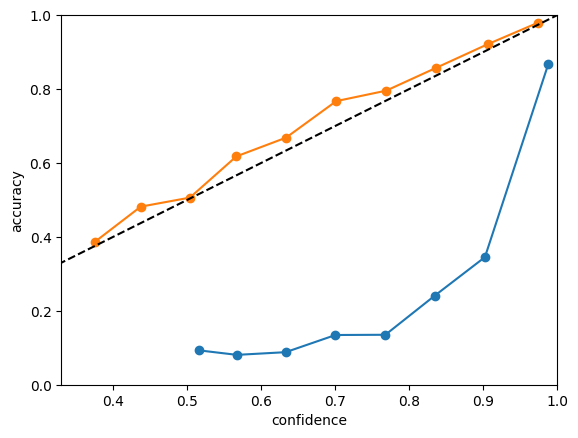

In [5]:
import matplotlib.pyplot as plt

dataset = 'snli'
path = f"/home/al826/rds/hpc-work/2023/prompts/calib/search/submit/outputs/flan-t5-large/{dataset}/prompt_0"
label_words = ['yes', 'maybe', 'no']

logits_reader = LogitsReader(path=path, dataset=dataset)

acc_1 = logits_reader.calc_acc(label_words=label_words, norm=None)
acc_2 = logits_reader.calc_acc(label_words=label_words, norm='log-norm')

ece_1 = logits_reader.calc_ECE(label_words=label_words, norm=None)
ece_2 = logits_reader.calc_ECE(label_words=label_words, norm='log-norm')

print(acc_1, ece_1)
print(acc_2, ece_2)

logits_reader.plot_conf_acc_curve(label_words=label_words, norm=None)
logits_reader.plot_conf_acc_curve(label_words=label_words, norm='log-norm')

plt.xlabel('confidence')
plt.ylabel('accuracy')
plt.plot([0,1],[0,1], linestyle='--', color='k')
plt.xlim(0.33, 1)
plt.ylim(0, 1)